<a href="https://colab.research.google.com/github/jananisree-a-s/SCT_DS_1/blob/main/Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Upload your ZIP dataset file (e.g., archive.zip)


Saving archive.zip to archive (4).zip
✔️ Files extracted to: /content/data
📂 Loaded CSV: StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


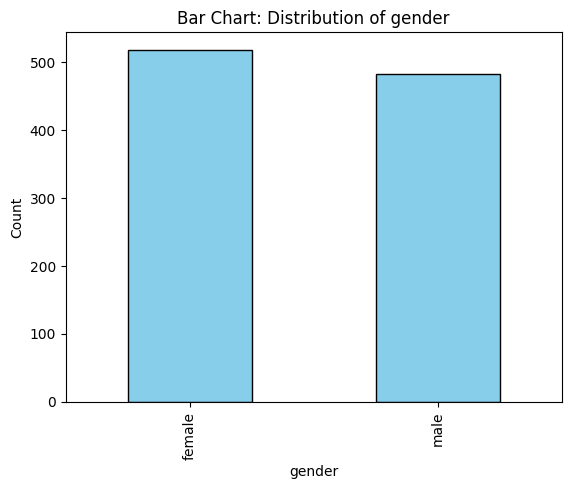

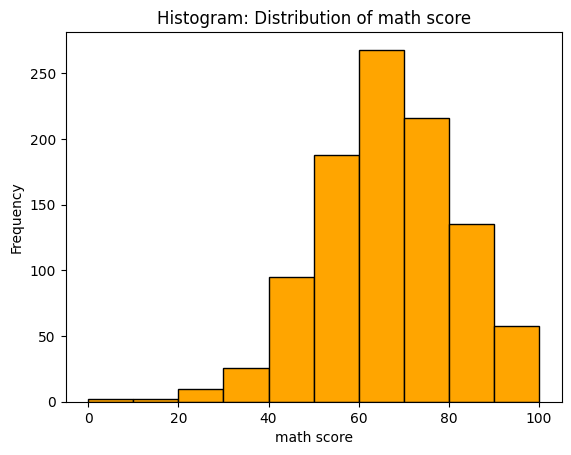


🔎 Available Columns:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [11]:
from google.colab import files
import zipfile, io, os, pandas as pd, matplotlib.pyplot as plt

print("📌 Upload your ZIP dataset file (e.g., archive.zip)")
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]

zip_ref = zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r')
zip_ref.extractall("/content/data")
zip_ref.close()
print("✔️ Files extracted to: /content/data")

csv_files = [f for f in os.listdir("/content/data") if f.endswith(".csv")]
df = pd.read_csv("/content/data/" + csv_files[0])
print(f"📂 Loaded CSV: {csv_files[0]}")
display(df.head())

categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['number']).columns

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan']

if len(categorical_cols) > 0:
    cat = categorical_cols[0]
    df[cat].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Chart: Distribution of {cat}")
    plt.xlabel(cat)
    plt.ylabel("Count")
    plt.show()
else:
    print("⚠️ No categorical columns found for bar chart.")

if len(numeric_cols) > 0:
    num = numeric_cols[0]
    df[num].plot(kind='hist', bins=10, color='orange', edgecolor='black')
    plt.title(f"Histogram: Distribution of {num}")
    plt.xlabel(num)
    plt.ylabel("Frequency")
    plt.show()
else:
    print("⚠️ No numeric columns found for histogram.")

print("\n🔎 Available Columns:")
print(df.columns.tolist())